In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


Bad key text.latex.unicode in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to 

In [2]:
data = pd.read_csv("/Users/harshithakonduru/Downloads/merge-csv.com__62557573b4355.csv")
data

,# CSV-File created with merge-csv.com
0,# --------------------------------------------...
1,"'@CAFinUS Thanks for this post. Some graphic,..."
2,'It was a horrific ending to life for these Ru...
3,'Dead Zs in #Ukraine\n\n#UkraineWar2022 #IStan...
4,'The world is watching. The coverage I’ve seen...
...,...
2598,'Цю пісню у виконанні про українську лють у ви...
2599,'#Ukrainewar2022\nThe whole world is with the ...
2600,"""Russkies playing hide and seek in the forest ..."
2601,'Pokaz Rosyjskiej mobilnej kuchni. #ukrainewar...


In [3]:
data.isnull().sum()

# CSV-File created with merge-csv.com    0
dtype: int64

In [4]:
data.rename(columns ={'# CSV-File created with merge-csv.com':'Comment'},inplace= True)


In [5]:
data

,Comment
0,# --------------------------------------------...
1,"'@CAFinUS Thanks for this post. Some graphic,..."
2,'It was a horrific ending to life for these Ru...
3,'Dead Zs in #Ukraine\n\n#UkraineWar2022 #IStan...
4,'The world is watching. The coverage I’ve seen...
...,...
2598,'Цю пісню у виконанні про українську лють у ви...
2599,'#Ukrainewar2022\nThe whole world is with the ...
2600,"""Russkies playing hide and seek in the forest ..."
2601,'Pokaz Rosyjskiej mobilnej kuchni. #ukrainewar...


In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshithakonduru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text

In [8]:
data["Comment"] = data["Comment"].apply(clean)

In [9]:
data["Comment"]


0                                                        
1       cafinus thanks post  graphic horrific gut wren...
2       horrific ending life russian soldiers lay dead...
3              dead zs  istandwithukraine️ combatfootage 
4       world watching coverage i’ve seen today mass c...
                              ...                        
2598    цю пісню у виконанні про українську лють у вик...
2599     whole world truthwith ukrainewith ukrainian h...
2600    russkies playing hide seek forest ukraine prop...
2601    pokaz rosyjskiej mobilnej kuchni   ukrain  via...
2602    moment missile hit kurenivka today look lucky ...
Name: Comment, Length: 2603, dtype: object

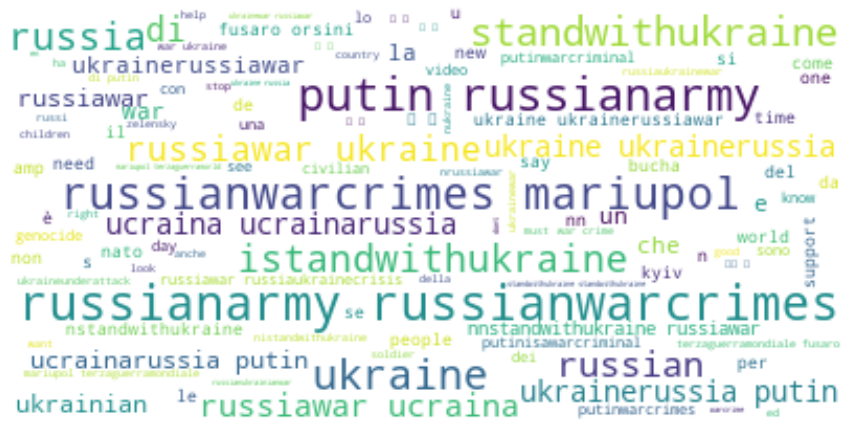

In [10]:
text = " ".join(i for i in data.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
df = data["Comment"].map(str)

In [12]:
df

0                                                        
1       cafinus thanks post  graphic horrific gut wren...
2       horrific ending life russian soldiers lay dead...
3              dead zs  istandwithukraine️ combatfootage 
4       world watching coverage i’ve seen today mass c...
                              ...                        
2598    цю пісню у виконанні про українську лють у вик...
2599     whole world truthwith ukrainewith ukrainian h...
2600    russkies playing hide seek forest ukraine prop...
2601    pokaz rosyjskiej mobilnej kuchni   ukrain  via...
2602    moment missile hit kurenivka today look lucky ...
Name: Comment, Length: 2603, dtype: object

In [22]:
nltk.download('vader_lexicon')
import ast
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Comment"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Comment"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Comment"]]
data["compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["Comment"]]
data = data[["Comment", "Positive", "Negative", "Neutral", "compound"]]
data[:50]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harshithakonduru/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Comment,Positive,Negative,Neutral,compound
0,,0.000,0.000,0.000,0.0000
1,cafinus thanks post graphic horrific gut wren...,0.158,0.240,0.601,-0.3612
2,horrific ending life russian soldiers lay dead...,0.000,0.474,0.526,-0.9274
3,dead zs istandwithukraine️ combatfootage,0.000,0.589,0.411,-0.6486
4,world watching coverage i’ve seen today mass c...,0.122,0.338,0.541,-0.7003
5,pennyflipper meidastouch istandwithukraine️ n🇺...,0.000,0.000,1.000,0.0000
6,grandson wants make ukrainian foods recipes sa...,0.198,0.000,0.802,0.6369
7,chefjoseandres wckitchen thankyou much nistand...,0.000,0.000,1.000,0.0000
8,im going deleting artstation due fact theyve c...,0.195,0.000,0.805,0.4404
9,fresh batch drones landed chaps istandwithukr...,0.315,0.000,0.685,0.3182


In [14]:
for index, row in data.iterrows():
    if row["compound"] >= 0.05:
        print(index, row["Comment"],"\n----->HAPPY")
    elif row["compound"] <= -0.05:
        print(index,row["Comment"], "----->SAD")
    else: 
        print(index,row["Comment"],"----->NEUTRAL")

0   ----->NEUTRAL
1 cafinus thanks post  graphic horrific gut wrenching msgs ukraine today 💔 putinwarcrimes slavaukraini  istandwithukraine️ ----->SAD
2 horrific ending life russian soldiers lay dead wastelands ukraine never return home buried  istandwithukraine️ war rip genocideofukrainians  ----->SAD
3 dead zs  istandwithukraine️ combatfootage  ----->SAD
4 world watching coverage i’ve seen today mass civilians killed heartbreaking 💔  need nato help need helpnistandwithukraine️🇺🇦  ----->SAD
5 pennyflipper meidastouch istandwithukraine️ n🇺🇦💙💛💔😢  ----->NEUTRAL
6 grandson wants make ukrainian foods recipes saw cabbage rolls golubtsi anyone recommend authentic recipe made cabbage rolls wants learn culture ukrainianrecipes istandwithukraine️ help 
----->HAPPY
7 chefjoseandres wckitchen thankyou much nistandwithukraine️ nchefsforukrainenartistsforukraine  ----->NEUTRAL
8 im going deleting artstation due fact theyve censoring ukranian artists supporting russia istandwithukraine️ 
----->HAPPY

In [15]:
data_positive= data[data['Positive']>=0.6]
data_positive

,Comment,Positive,Negative,Neutral,compound
58,iaponomarenko great commentary thank younnista...,0.688,0.000,0.312,0.7650
88,abc hope said yes x istandwithukraine️,0.651,0.000,0.349,0.6808
104,ukrainians strong istandwithukraine️,0.623,0.000,0.377,0.5106
146,kyivindependent tonyserrata brave beautiful wo...,0.646,0.000,0.354,0.8074
163,love ukrainiansnistandwithukraine️ nnatoinukra...,0.677,0.000,0.323,0.6369
169,celebrating love happiness war love wins 😭♥️♥️...,0.798,0.160,0.041,0.9477
219,acosta putin believe freedom press kind freedo...,0.615,0.000,0.385,0.9517
246,vikvkravchuk beautiful 🇺🇦nnistandwithukraine️,0.661,0.000,0.339,0.5994
264,unbelievable nistandwithukraine️,0.643,0.000,0.357,0.2023
321,mariiazolkina strong amp brave win 🙏💙🇺🇦🤗 istan...,0.724,0.000,0.276,0.8885


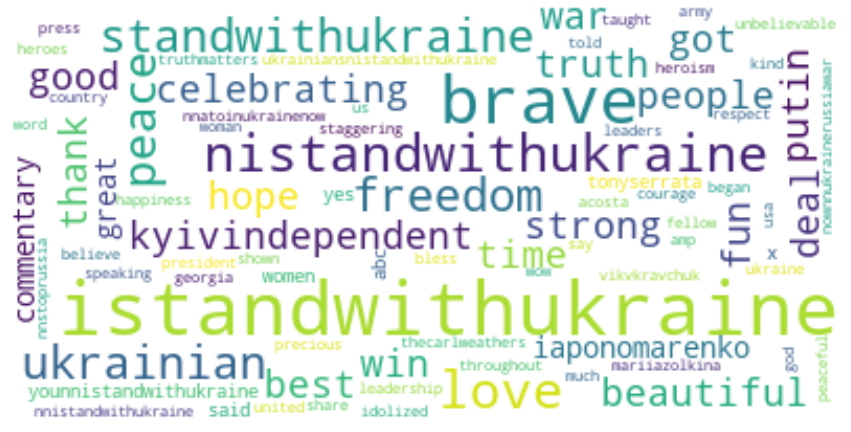

In [16]:
positive =' '.join([i for i in data_positive['Comment'][data_positive['Positive'] > data_positive["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
data_negative= data[data['Negative']>=0.6]
data_negative

,Comment,Positive,Negative,Neutral,compound
117,outraged part problem istandwithukraine️ 🇺🇦,0.000,0.674,0.326,-0.7351
125,jakluge genocide horrific weeping ukraine war ...,0.000,0.615,0.385,-0.9042
138,images coming bucha distressing heartbreaking ...,0.000,0.675,0.325,-0.9674
156,bloody wicked 😢💔 istandwithukraine️,0.000,0.759,0.241,-0.7430
174,twitter… problem fuck istandwithukraine️,0.000,0.756,0.244,-0.7351
248,rape torture kidnap slavery murder used bastar...,0.000,0.629,0.371,-0.9846
285,bettemidler bad istandwithukraine️,0.000,0.636,0.364,-0.5423
337,one “compromise” murderous dictator also war c...,0.000,0.622,0.378,-0.9100
340,horrific russiawarcrimes istandwithukraine️,0.000,0.688,0.312,-0.6597
347,much evil 😢 istandwithukraine️,0.000,0.688,0.312,-0.6597


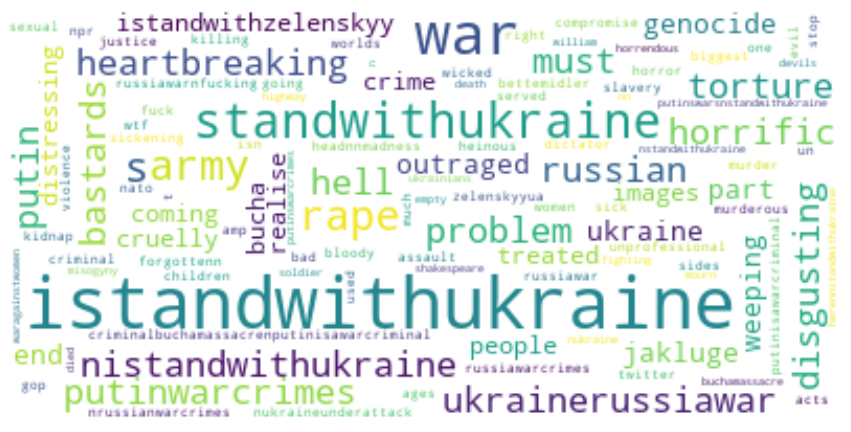

In [18]:
negative =' '.join([i for i in data_negative['Comment'][data_negative['Negative'] > data_negative["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
wordcloud
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

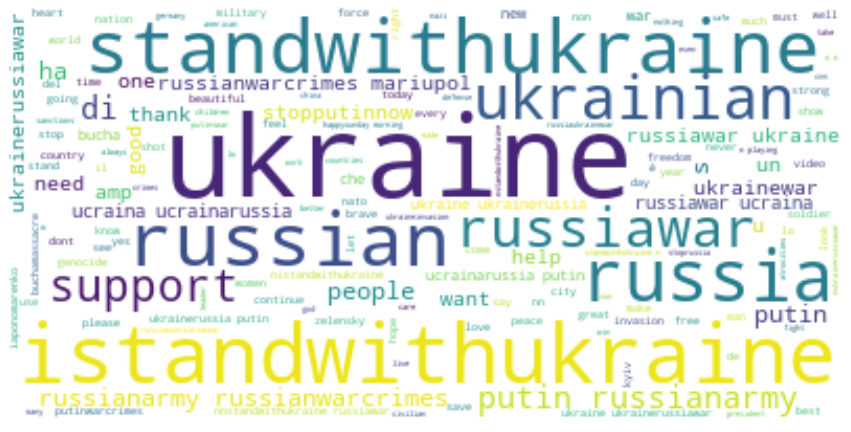

In [19]:
positive =' '.join([i for i in data['Comment'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

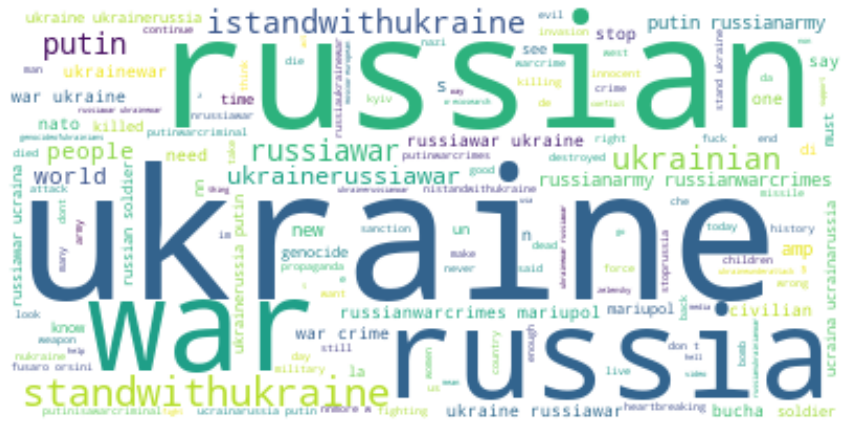

In [20]:
negative =' '.join([i for i in data['Comment'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
wordcloud
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()